In [2]:
import pandas as pd

# read csv files
df_listings = pd.read_csv("real data/listings.csv")
print("="*100)
print("listings.csv")
print(df_listings.columns)
print("Length of data:", len(df_listings))

df_neighbourhoods = pd.read_csv("real data/neighbourhoods.csv")
print("="*100)
print("neighbourhoods.csv")
print(df_neighbourhoods.columns)
print("Length of data:", len(df_neighbourhoods))

df_reviews = pd.read_csv("real data/reviews.csv")
print("="*100)
print("reviews.csv")
print(df_reviews.columns)
print("Length of data:", len(df_reviews))


listings.csv
Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')
Length of data: 37765
neighbourhoods.csv
Index(['neighbourhood_group', 'neighbourhood'], dtype='object')
Length of data: 230
reviews.csv
Index(['listing_id', 'date'], dtype='object')
Length of data: 940310


In [1]:
print(df_reviews.head())
print(df_listings.head())

NameError: name 'df_reviews' is not defined

In [4]:
df_listings.head(30)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.753560,-73.985590,Entire home/apt,NaN,30,49,2022-06-21,0.28,3,300,0,NaN
1,5136,Spacious Family Friendly Duplex w/ Patio + Yard,7378,Rebecca,Brooklyn,Sunset Park,40.662650,-73.994540,Entire home/apt,215.0,30,4,2023-08-20,0.03,1,71,1,NaN
2,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,81.0,30,193,2024-05-18,1.05,1,193,3,NaN
3,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.801070,-73.942550,Private room,65.0,30,1,2022-06-05,0.04,2,365,0,NaN
4,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.787780,-73.947590,Private room,65.0,30,247,2024-03-06,1.38,1,212,2,NaN
5,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.712480,-73.958810,Private room,NaN,30,13,2022-09-12,0.08,2,0,0,NaN
6,7097,"Perfect for Your Parents, With Garden & Patio",17571,Jane,Brooklyn,Fort Greene,40.691940,-73.973890,Private room,205.0,2,374,2024-06-02,2.12,2,219,36,OSE-STRREG-0000008
7,7801,Sunny Williamsburg Loft with Sauna,21207,Chaya,Brooklyn,Williamsburg,40.718807,-73.956177,Entire home/apt,290.0,30,12,2023-10-31,0.07,1,219,2,NaN
8,8490,"Maison des Sirenes1,bohemian, luminous apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.684556,-73.939634,Entire home/apt,170.0,30,190,2023-10-16,1.05,2,215,7,NaN
9,9357,Midtown Pied-a-terre,30193,Tommi,Manhattan,Hell's Kitchen,40.767240,-73.986640,Entire home/apt,175.0,30,58,2017-08-13,0.32,1,281,0,NaN


In [7]:
# finde alle einträge, die duplikate bezüglich der spalten longitude und latitude haben. also bei denen die kombination aus longitude und latitude gleich ist
df_dupes = df_listings[df_listings.duplicated(subset=['longitude', 'latitude'], keep=False)]

# to csv
df_dupes.to_csv("data/duplicate_coordinates.csv", index=False)

In [10]:
df_listings.describe().to_csv("data/listings_describe.csv")

In [5]:
# show all entries with longitude = -73.985590
print(df_listings[df_listings['longitude'] == -73.985590])

                        id                                              name  \
0                     2595                             Skylit Midtown Castle   
5740              10612564               Apartment share near Lincoln Center   
9748              21239226                Cozy 1 br in the heart of Gramercy   
11099             24779271                                      Private Room   
34338  1070272052169818710         One Bedroom Queen at Times Square Central   
34339  1070272637247149842  One Bedroom 2 Queen Beds at Times Square Central   

         host_id                                   host_name  \
0           2845                                    Jennifer   
5740    54763152                                    Mary Sue   
9748   153509107                                     Vanessa   
11099   65119217                                     Frances   
34338  556869189  Hilton Garden Inn Times Square Central NYC   
34339  556869189  Hilton Garden Inn Times Square Centra

In [105]:
# drop rows where df['number_of_reviews'][i] < 10 or np.isnan(df['review_rate_number'][i]), cause they are not useful for our analysis
df = df.dropna(subset=['house_rules'])
df = df.dropna(subset=['review_rate_number'])
df = df[df['number_of_reviews'] >= 10]

print(df.head())
print("Length of data:", len(df))

        id                                       NAME      host_id  \
1  1002102                      Skylit Midtown Castle  52335172823   
5  1004098  Large Cozy 1 BR Apartment In Midtown East  45498551794   
6  1004650                            BlissArtsSpace!  61300605564   
7  1005202                            BlissArtsSpace!  90821839709   
8  1005754            Large Furnished Room Near B'way  79384379533   

  host_identity_verified host_name neighbourhood_group       neighbourhood  \
1               verified     Jenna           Manhattan             Midtown   
5               verified  Michelle           Manhattan         Murray Hill   
6                    NaN   Alberta            Brooklyn  Bedford-Stuyvesant   
7            unconfirmed      Emma            Brooklyn  Bedford-Stuyvesant   
8               verified    Evelyn           Manhattan      Hell's Kitchen   

        lat      long        country  ... service_fee minimum_nights  \
1  40.75362 -73.98377  United States  

In [106]:
from transformers import pipeline

model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_pipeline = pipeline("sentiment-analysis", model=model_name, return_all_scores=True)


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
C:\Users\finns\OneDrive\Desktop\Studium\_Data Science\data_science_finn\pythonProject\.venv\Lib\site-packages\transformers\pipelines\text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all

In [107]:
texts = list(df.house_rules.values)

# limit texts to 500
# texts_shortened = texts[:2000]
texts_shortened = texts
results = sentiment_pipeline(texts_shortened)

for text, result, review in zip(texts_shortened, results, df.review_rate_number.values):
    print("=" * 100)
    print(f"Text: {text}")
    for res in result:
        print(f"{res['label']}: {res['score']}")
    print(f"Original: {review}")

print("length of results:", len(results))

Text: Pet friendly but please confirm with me if the pet you are planning on bringing with you is OK. I have a cute and quiet mixed chihuahua. I could accept more guests (for an extra fee) but this also needs to be confirmed beforehand. Also friends traveling together could sleep in separate beds for an extra fee (the second bed is either a sofa bed or inflatable bed). Smoking is only allowed on the porch.
negative: 0.009708725847303867
neutral: 0.38370707631111145
positive: 0.6065841913223267
Original: 4.0
Text: No smoking, please, and no drugs.
negative: 0.2719208598136902
neutral: 0.5276346802711487
positive: 0.2004445195198059
Original: 3.0
Text: Please no shoes in the house so bring slippers or extra socks to keep your feet warm- especially in winter! No smoking either inside or outside. Please be considerate of neighbors from 10pm-7am in terms of noise. Please take out any trash and leave in the large blue garbage bin at the end of the driveway when you leave.
negative: 0.0391926

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [108]:
# so the columns are negative, neutral, positive and each result is a row.
df_results = pd.DataFrame(columns=['negative', 'neutral', 'positive'])
for i, result in enumerate(results):
    for res in result:
        if res['label'] == 'negative':
            df_results.loc[i, 'negative'] = res['score']
        elif res['label'] == 'neutral':
            df_results.loc[i, 'neutral'] = res['score']
        elif res['label'] == 'positive':
            df_results.loc[i, 'positive'] = res['score']
            
print(df_results.head())

   negative   neutral  positive
0  0.009709  0.383707  0.606584
1  0.271921  0.527635  0.200445
2  0.039193  0.518508    0.4423
3  0.002749  0.087003  0.910248
4  0.057797  0.836903    0.1053


In [109]:
# for each column of the df_results, calculate its mean, median, std, min, max
# rounded on 2 decimal places each, in a table format

df_results_stats = pd.DataFrame(columns=['mean', 'median', 'std', 'min', 'max'])
for col in df_results.columns:
    df_results_stats.loc[col] = [round(df_results[col].mean(), 2), round(df_results[col].median(), 2), round(df_results[col].std(), 2), round(df_results[col].min(), 2), round(df_results[col].max(), 2)]

df_results_stats

,mean,median,std,min,max
negative,0.11,0.06,0.13,0.00,0.87
neutral,0.64,0.68,0.20,0.01,0.95
positive,0.26,0.17,0.23,0.01,0.99


In [122]:
# add row that contains the positive to negative ratio
df_results['positive_negative_ratio'] = df_results['positive'] - df_results['negative']

# Mittelwerte und Standardabweichungen
mean_scores = {'negative': 0.09, 'neutral': 0.63, 'positive': 0.28}
std_scores = {'negative': 0.11, 'neutral': 0.20, 'positive': 0.22}

# stattdessen direkt aus dem df_results_stats nehmen
# mean_scores = {'negative': df_results_stats.loc['negative', 'mean'], 'positive': df_results_stats.loc['positive', 'mean']}
# std_scores = {'negative': df_results_stats.loc['negative', 'std'], 'positive': df_results_stats.loc['positive', 'std']}

# Normalisierung und Berechnung des sentiment_scores in einer Zeile
df_results['normalized_sentiment_score'] = (
    (df_results['positive'] - mean_scores['positive']) / std_scores['positive'] - 
    (df_results['negative'] - mean_scores['negative']) / std_scores['negative']
)

print(df_results.head())
print(len(df_results))

   negative   neutral  positive positive_negative_ratio  \
0  0.009709  0.383707  0.606584                0.596875   
1  0.271921  0.527635  0.200445               -0.071476   
2  0.039193  0.518508    0.4423                0.403107   
3  0.002749  0.087003  0.910248                0.907499   
4  0.057797  0.836903    0.1053                0.047503   

  normalized_sentiment_score  
0                   2.214394  
1                  -2.015442  
2                   1.199612  
3                   3.657956  
4                  -0.501337  
21129


In [123]:
# combine with the original df (only take the rows that have a sentiment analysis result)
df_combined = df[:len(df_results)]
df_combined = df_combined.reset_index(drop=True)

df_combined = pd.concat([df_combined, df_results], axis=1)

print(df_combined.head())
print(len(df_combined))

# save the combined data to a new csv file
#df_combined.to_csv("data/Airbnb_Open_Data_with_sentiment.csv", index=False)

        id                                       NAME      host_id  \
0  1002102                      Skylit Midtown Castle  52335172823   
1  1004098  Large Cozy 1 BR Apartment In Midtown East  45498551794   
2  1004650                            BlissArtsSpace!  61300605564   
3  1005202                            BlissArtsSpace!  90821839709   
4  1005754            Large Furnished Room Near B'way  79384379533   

  host_identity_verified host_name neighbourhood_group       neighbourhood  \
0               verified     Jenna           Manhattan             Midtown   
1               verified  Michelle           Manhattan         Murray Hill   
2                    NaN   Alberta            Brooklyn  Bedford-Stuyvesant   
3            unconfirmed      Emma            Brooklyn  Bedford-Stuyvesant   
4               verified    Evelyn           Manhattan      Hell's Kitchen   

        lat      long        country  ... review_rate_number  \
0  40.75362 -73.98377  United States  ...     

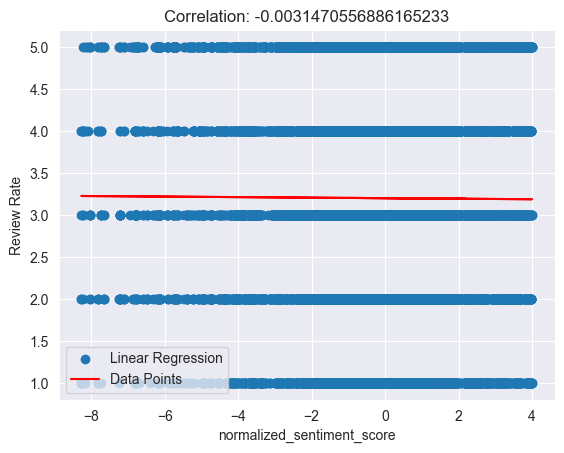

In [112]:
# plot the correlation between the sentiment score and the review rate
import matplotlib.pyplot as plt

plt.scatter(df_combined['normalized_sentiment_score'], df_combined['review_rate_number'])
plt.xlabel("normalized_sentiment_score")
plt.ylabel("Review Rate")

# linear regression
from sklearn.linear_model import LinearRegression

X = df_combined['normalized_sentiment_score'].values.reshape(-1, 1)
y = df_combined['review_rate_number'].values

reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.legend(["Linear Regression", "Data Points"])
plt.title(f"Correlation: {reg.coef_[0]}")

plt.show()

In [113]:
# remove 80 % of the data that are distributed commonly and leave only the 20 % that are the most extreme (in each direction 10%)
df_combined = df_combined.sort_values(by='normalized_sentiment_score', ascending=False)
df_combined = df_combined.reset_index(drop=True)
df_lowest = df_combined[:int(0.05 * len(df_combined))]
df_highest = df_combined[int(0.95 * len(df_combined)):]
print(df_lowest.head())
print(df_highest.tail())
df_combined_low_high = pd.concat([df_lowest, df_highest])

# print first and last 5 rows to check if the data is sorted correctly
print(df_combined_low_high.head())
print(df_combined_low_high.tail())
    

         id                                               NAME      host_id  \
0  15506943     Spacious bedroom in Artist's Apartment-Atelier   5642791107   
1  45100282    Clean, Modern Duplex Upper East Side with Patio  75451378888   
2  48134618                        Stunning Central Park - 1BR  15936476646   
3   9571927                        Stunning Central Park - 1BR  54228961160   
4   1658573  Charming ROOM(s)*Lovely BUSHWICK Block*25min->...  75646528091   

  host_identity_verified host_name neighbourhood_group    neighbourhood  \
0               verified    Nastya           Manhattan  Lower East Side   
1               verified     Yosef           Manhattan  Upper East Side   
2               verified    Martin           Manhattan           Harlem   
3               verified    Martin           Manhattan           Harlem   
4            unconfirmed     Kelly            Brooklyn         Bushwick   

        lat      long        country  ... review_rate_number  \
0  40.7181

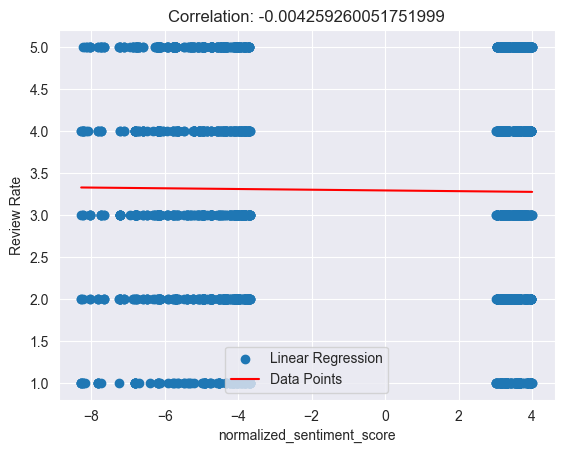

In [114]:
# plot the correlation between the sentiment score and the review rate
import matplotlib.pyplot as plt

plt.scatter(df_combined['normalized_sentiment_score'], df_combined['review_rate_number'])
plt.xlabel("normalized_sentiment_score")
plt.ylabel("Review Rate")

# linear regression
from sklearn.linear_model import LinearRegression

X = df_combined['normalized_sentiment_score'].values.reshape(-1, 1)
y = df_combined['review_rate_number'].values

reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.legend(["Linear Regression", "Data Points"])
plt.title(f"Correlation: {reg.coef_[0]}")

plt.show()

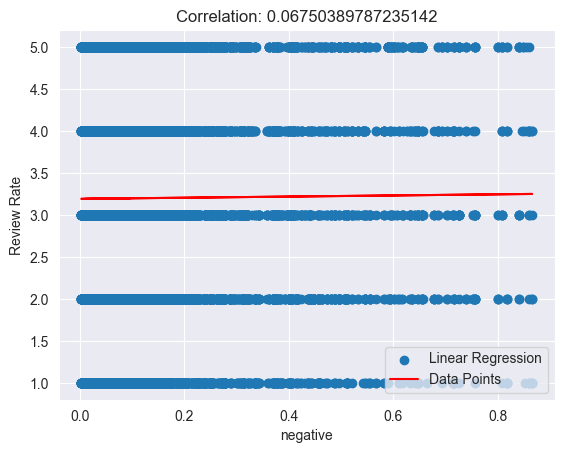

In [124]:
# plot the correlation between the negative score and the review rate
import matplotlib.pyplot as plt

plt.scatter(df_combined['negative'], df_combined['review_rate_number'])
plt.xlabel("negative")
plt.ylabel("Review Rate")

# linear regression
from sklearn.linear_model import LinearRegression

X = df_combined['negative'].values.reshape(-1, 1)
y = df_combined['review_rate_number'].values

reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.legend(["Linear Regression", "Data Points"])
plt.title(f"Correlation: {reg.coef_[0]}")

plt.show()

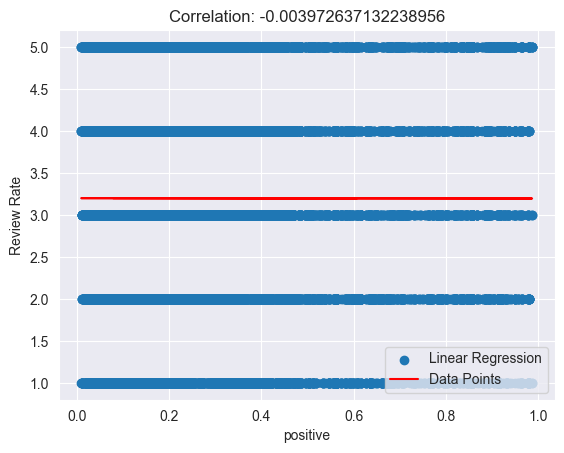

In [125]:
# plot the correlation between the negative score and the review rate
import matplotlib.pyplot as plt

plt.scatter(df_combined['positive'], df_combined['review_rate_number'])
plt.xlabel("positive")
plt.ylabel("Review Rate")

# linear regression
from sklearn.linear_model import LinearRegression

X = df_combined['positive'].values.reshape(-1, 1)
y = df_combined['review_rate_number'].values

reg = LinearRegression().fit(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.legend(["Linear Regression", "Data Points"])
plt.title(f"Correlation: {reg.coef_[0]}")

plt.show()

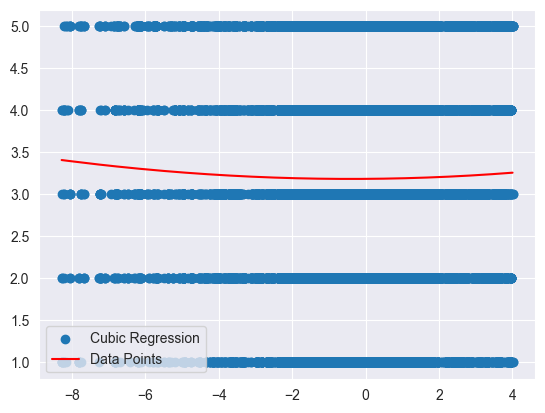

In [117]:
# use cubic regression instead of linear regression
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = df_combined['normalized_sentiment_score'].values.reshape(-1, 1)
y = df_combined['review_rate_number'].values

model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.legend(["Cubic Regression", "Data Points"])

plt.show()


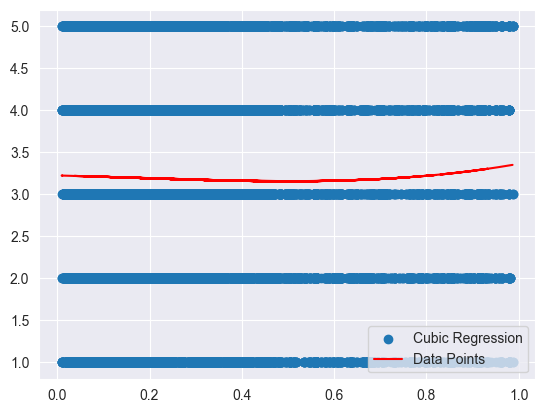

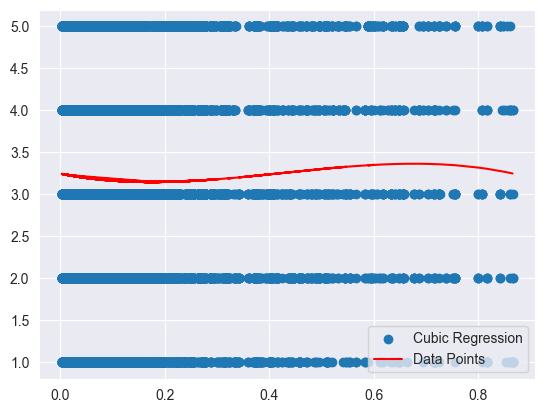

In [118]:
# also cubic regression for positive and negative
X = df_combined['positive'].values.reshape(-1, 1)
y = df_combined['review_rate_number'].values

model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.legend(["Cubic Regression", "Data Points"])

plt.show()

X = df_combined['negative'].values.reshape(-1, 1)
y = df_combined['review_rate_number'].values

model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X, y)

plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.legend(["Cubic Regression", "Data Points"])

plt.show()

NameError: name 'pdmatrix' is not defined

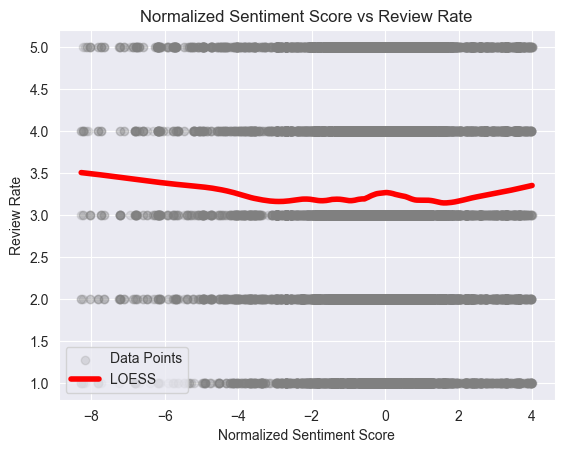

In [126]:
import statsmodels.api as sm

# Daten vorbereiten
X = df_combined['normalized_sentiment_score'].values
y = df_combined['review_rate_number'].values

# LOESS
lowess = sm.nonparametric.lowess
y_pred = lowess(y, X, frac=0.3)

# Plot
plt.scatter(X, y, label='Data Points', color='grey', alpha=0.2)
plt.title("Normalized Sentiment Score vs Review Rate")
plt.plot(y_pred[:, 0], y_pred[:, 1], label='LOESS', color='red', linewidth=4)
plt.xlabel("Normalized Sentiment Score")
plt.ylabel("Review Rate")

plt.legend()
plt.show()


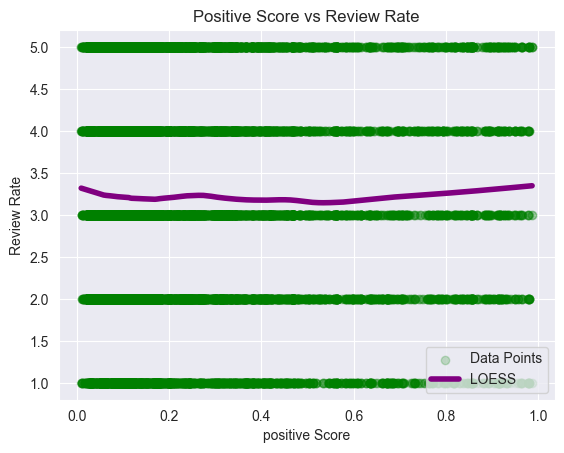

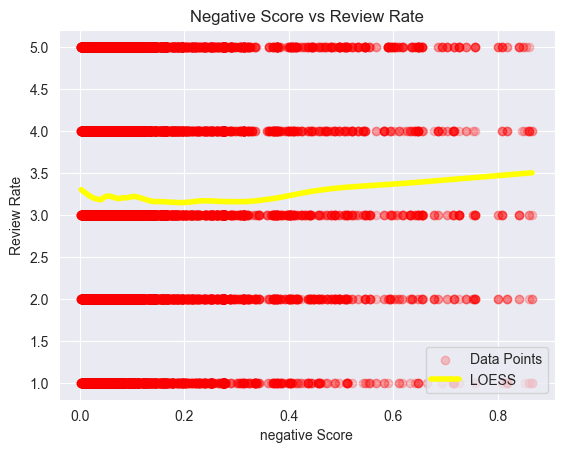

In [127]:
# also for positive and negative

# Daten vorbereiten
X = df_combined['positive'].values
y = df_combined['review_rate_number'].values

# LOESS
lowess = sm.nonparametric.lowess
y_pred = lowess(y, X, frac=0.3)

# Plot
plt.scatter(X, y, label='Data Points', color='green', alpha=0.2)
plt.title("Positive Score vs Review Rate")
plt.plot(y_pred[:, 0], y_pred[:, 1], label='LOESS', color='purple', linewidth=4)
plt.xlabel("positive Score")
plt.ylabel("Review Rate")
plt.legend()
plt.show()

# Daten vorbereiten
X = df_combined['negative'].values
y = df_combined['review_rate_number'].values

# LOESS
lowess = sm.nonparametric.lowess
y_pred = lowess(y, X, frac=0.3)

# Plot
plt.scatter(X, y, label='Data Points', color='red', alpha=0.2)
plt.title("Negative Score vs Review Rate")
plt.plot(y_pred[:, 0], y_pred[:, 1], label='LOESS', color='yellow', linewidth=4)
plt.xlabel("negative Score")
plt.ylabel("Review Rate")
plt.legend()
plt.show()
